In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# abrir un archivo csv y cargar solo los nombres de las columnas
df = pd.read_csv("data/df_fe_lgb_optimization_cv_competencia01_e.csv", nrows=0)
column_names = df.columns.tolist()
#guardar los nombres de las columnas en un archivo xlxs
# with pd.ExcelWriter('fe_column_names.xlsx') as writer:
#     pd.DataFrame(column_names, columns=['Column Names']).to_excel(writer, index=False)

# guardar los nombres de las columnas en un archivo json
with open('fe_column_names.json', 'w') as f:
    json.dump(column_names, f)  

In [ ]:
# abrir csv y extraer las columnas  "mcuentas_saldo_percentil" , 'mcuentas_saldo' y 'foto_mes'
df = pd.read_csv("data/df_fe_lgb_optimization_cv_competencia01_d.csv", usecols=["mcuentas_saldo_percentil", 'mcuentas_saldo', 'foto_mes'])

# graficar un histograma de la columna "mcuentas_saldo_percentil" para el año 2020 (foto_mes = 202106)
df_2020 = df[df['foto_mes'] == 202106]
plt.figure(figsize=(10, 6))
sns.histplot(df_2020['mcuentas_saldo_percentil'], bins=30, kde=True)
plt.title('Histograma de mcuentas_saldo_percentil en 202106')




In [7]:
df_2020.shape

(162669, 3)

In [ ]:
#graficar un histograma de la columna "mcuentas_saldo" para el año 2020 (foto_mes = 202104)
plt.figure(figsize=(10, 6))
sns.histplot(df_2020['mcuentas_saldo'], bins=30, kde=True)
plt.title('Histograma de mcuentas_saldo en 202104')


   trial_number                                             params      value  \
0             0  {'num_iterations': 727, 'num_leaves': 1546, 'l...  455840670   
1             1  {'num_iterations': 344, 'num_leaves': 645, 'le...  477391890   
2             2  {'num_iterations': 774, 'num_leaves': 1881, 'l...  467908567   
3             3  {'num_iterations': 532, 'num_leaves': 786, 'le...  453437476   
4             4  {'num_iterations': 457, 'num_leaves': 1650, 'l...  464721165   

                    datetime  \
0 2025-10-10 20:45:25.329279   
1 2025-10-10 20:48:15.252957   
2 2025-10-10 20:52:12.538960   
3 2025-10-10 21:00:16.202523   
4 2025-10-10 21:02:58.069976   

                                        ganancias_cv     state  
0  [375024000.0, 390388000.0, 395464000.0, 399964...  COMPLETE  
1  [412808000.0, 426120000.0, 433136000.0, 438676...  COMPLETE  
2  [350320000.0, 358904000.0, 367076000.0, 379392...  COMPLETE  
3  [343516000.0, 369748000.0, 389616000.0, 391300...  COMPLE

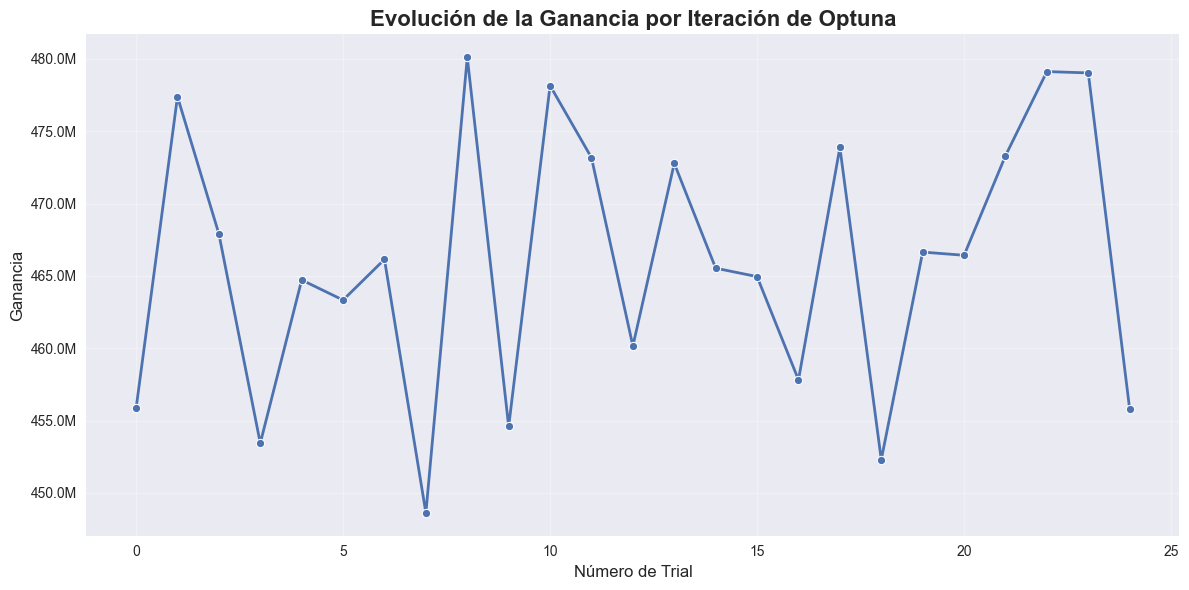


Estadísticas de ganancia:
Ganancia máxima: 480,118,635
Ganancia mínima: 448,617,032
Ganancia promedio: 466,048,438
Trial con mejor ganancia: 8


In [12]:


df = pd.read_json("resultados/lgb_optimization_cv_competencia01_h_iteraciones.json")
print(df.head())

#Graficar ganancia Optuna eje x trial_number eje y ganancia
# Configurar el estilo
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12, 6))

# Crear el gráfico
sns.lineplot(data=df, x='trial_number', y='value', marker='o', linewidth=2, markersize=6)

# Personalizar el gráfico
plt.title('Evolución de la Ganancia por Iteración de Optuna', fontsize=16, fontweight='bold')
plt.xlabel('Número de Trial', fontsize=12)
plt.ylabel('Ganancia', fontsize=12)
plt.grid(True, alpha=0.3)

# Formatear el eje y para mostrar valores en millones
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))

# Ajustar layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Opcional: Mostrar estadísticas básicas
print(f"\nEstadísticas de ganancia:")
print(f"Ganancia máxima: {df['value'].max():,.0f}")
print(f"Ganancia mínima: {df['value'].min():,.0f}")
print(f"Ganancia promedio: {df['value'].mean():,.0f}")
print(f"Trial con mejor ganancia: {df.loc[df['value'].idxmax(), 'trial_number']}")